In [34]:
import numpy as np
import pandas as pd

from pyspark.mllib.linalg.distributed import IndexedRowMatrix, IndexedRow, RowMatrix, BlockMatrix
from pyspark.mllib.linalg import Vectors, VectorUDT, Vector
from pyspark.ml.feature import StandardScaler, PCA
#from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import udf, col
from pyspark.sql import SparkSession

In [2]:
pd.set_option('display.max_columns', int(1e7))
pd.set_option('display.max_rows', int(1e7))
pd.set_option('display.width', int(1e7))

------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Defining OpheliaSpark Session for pseudo-distributed computing:

In [3]:
spark = SparkSession.builder.appName('Single_Value_Decomposition_Portfolio').getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Single_Value_Decomposition_Portfolio>

# Reading persisted Portfolio Yields dataframe:

In [4]:
portfolio_yield_window_path = '/data/core/fince/data/portfolioOptimization/portfolio_yield_window/'
portfolio_yield_df = spark.read.parquet(portfolio_yield_window_path)

In [5]:
portfolio_yield_df.limit(5).toPandas()

,row_num,operation_id,operation_date_year,operation_date_month,operation_date_day,SCOTIAG_yield,AXESCP_yield,BMERGOB_yield,BMRGOB25_yield,VALUEF4_yield,BLKDIA7_yield,BLKGUB1_yield,GBMGUBL_yield,INVEXGU_yield,NTEGUB13_yield,NTEGUB15_yield,PRINFGU_yield,ST&ER1X_yield,STERGOB_yield,SURCETE_yield,VECTPRE_yield,FONDEO_yield,SCOTIA1_yield,BMERLIQ28_yield,DINBUR1_yield,FONSER130_yield,GBMF2_yield,INBUMAX_yield,INVEXCP_yield,ACTIREN_yield,SUR1E_yield,MONEX28_yield,BLKDIN45_yield,VECTRF48_yield,NTEMP+50_yield,SBANKCP_yield,BMERLIQ52_yield,BMERTES_yield,BMRGOB254_yield,BLKDIA55_yield,BLKLIQ/A_yield,BLKPLUSA_yield,FONSER161_yield,PYMES_yield,ST&ER1P_yield,STER10P_yield,SUPER_yield,INVEXDX_yield,HSBCEMP69_yield,VECTRF71_yield,SCOTIA2_yield,ACTIGOB74_yield,AFIRPLU_yield,AXESMP76_yield,BLK1LIQA_yield,HSBCMP83_yield,INVEXMP85_yield,NTEMP+86_yield,PRINFMP88_yield,PRINMAS89_yield,VECTMD92_yield,HSBCEMP93_yield,ACTIMED_yield,ALTERNA_yield,GBMF3_yield,GBMM3_yield,HSBCCOR_yield,NTEDP_yield,NTEMP+105_yield,SURCORP_yield,FINDE1110_yield,SBANKMP_yield,INVEXMP117_yield,DMEDIO_yield,PRINFMP119_yield,NTEMP+120_yield,BONDDIA_yield,PRINMAS125_yield,AXESMP130_yield,GBMGUB_yield,SCOTILP_yield,INBUREX_yield,PRINGLP_yield,SUR30E_yield,SURBONO_yield,AXESLP_yield,SCOTLPG_yield,SCOTIMB_yield,NAFINTR_yield,PRINFTR_yield,STEREAL_yield,SURUDI_yield,FT/REAL_yield,VALUEF2_yield,VALUEF7_yield,SCOTUDI_yield,SCOTDOL_yield,BBVADOL183_yield,INVEXCO185_yield,VECTCOB188_yield,HSBCDOL189_yield,SBANKDL_yield,BBVADOL195_yield,INVEXCO197_yield,VECTCOB200_yield,HSBCDOL201_yield,SCOT-FX_yield,ACTICOB_yield,BLKDOLS_yield,PRGLOB_yield,ST&ERUS_yield,SURUSD_yield,TEMGBIA_yield,NAVIGTR_yield,SCOTIPC_yield,ACTIVAR_yield,BMERIND_yield,NAFINDX_yield,SURIPC_yield,VECTIND_yield,ACTIPAT_yield,BLKPAT_yield,BLKIPC_yield,GBMCRE_yield,GBMMOD_yield,HSBCBOL_yield,INVEXMX_yield,MAYA_yield,NTESEL_yield,PRINRVA_yield,SURPAT_yield,VECTPA_yield,ACTINMO_yield,BLKFIBR_yield,SCOTUSA_yield,ACTI500261_yield,VECTSIC262_yield,BLKUSEQ265_yield,FRANOPR266_yield,FRANUSA267_yield,NTEUSA269_yield,STERDOW270_yield,ACTI500272_yield,BLKUSEQ276_yield,FRANOPR277_yield,FRANUSA278_yield,NTEUSA280_yield,STERDOW281_yield,VECTSIC282_yield,AXESGLO_yield,BLKINT1_yield,GBMTRV_yield,INVEXTK_yield,NTEGLA_yield,SURGLOB_yield,SCOTEUR_yield,AXESEDM_yield,BBVAE50_yield,SCOTI12_yield,GBMPCON_yield,PRINLS1_yield,SURMOD_yield,SVIVE50310_yield,SCOTI14_yield,ELITE/C_yield,GBMPMOD314_yield,HSBCF2_yield,HSBCF3317_yield,PRINLS2319_yield,SUR2026320_yield,SURCRE321_yield,SVIVE35322_yield,SBANK50_yield,DIVER/A324_yield,ELITE/M326_yield,GOLD4MA329_yield,PRINLS3331_yield,SUR2034334_yield,SUR2042335_yield,SURAGR337_yield,SVIVE20338_yield,SCOTQNT_yield,DIVER/A340_yield,ELITE/M342_yield,GBMPMOD344_yield,GOLD4MA345_yield,GOLD5MA_yield,HSBCF3347_yield,SURCRE352_yield,SURAGR353_yield,HSBCF4_yield,PRINLS2357_yield,PRINLS3358_yield,GBMPICT_yield,SVIVE60_yield,SUR2018_yield,HSBCJUB_yield,SUR2026370_yield,HSBC-50_yield,SVIVE50376_yield,SUR2034377_yield,HSBC-60_yield,SVIVE35383_yield,SUR2042384_yield,HSBC-70_yield,SVIVE20390_yield,HSBC-80_yield,FINDE1400_yield,ACTIGOB401_yield,AXESMP402_yield,HSBCMP405_yield,INVEXMP407_yield,NAFFP28_yield,PRINFMP410_yield,PRINMAS411_yield,VECTMD414_yield,operation_date
0,7,3805,2019,8,7,0.000404,0.000149,0.000422,0.000405,0.000347,0.000412,0.000407,0.000404,0.000348,0.000200,0.000401,0.000385,0.000267,0.000384,0.000341,0.000371,0.000202,0.000217,0.000212,0.000153,0.000174,0.000214,0.000177,0.000127,0.000246,0.000199,0.000207,0.000203,0.000204,0.000203,0.000223,0.000212,0.000206,0.000222,0.000206,0.000173,0.000206,0.000174,0.000154,0.000163,0.000155,0.000175,0.000148,0.000163,0.000204,0.000138,0.000203,0.000213,0.000154,0.000199,0.000168,0.000172,0.000203,0.000132,0.000056,0.000170,0.000163,0.000238,0.000253,0.000116,0.000170,0.000041,0.000217,0.000203,0.000076,0.000140,1.336872e-04,0.000172,0.000280,0.000132,0.000203,0.000182,0.000056,0.000154,0.000195,-0.000092,-0.000217,-0.000277,-0.000372,-0.000768,-0.000012,-0.000006

In [6]:
field_array = portfolio_yield_df.columns[5:-1]
monthly_return = np.array(portfolio_yield_df.select(*field_array).collect())
print('test with p:', len(field_array), 'funds')

test with p: 211 funds


In [7]:
print('monthly_return matrix:\n')
monthly_return

monthly_return matrix:



array([[ 4.03694420e-04,  1.49328414e-04,  4.21816132e-04, ...,
         1.31713344e-04,  5.64515468e-05,  1.69598798e-04],
       [ 1.08313418e-04,  4.31607721e-05,  1.14089938e-04, ...,
         1.28247343e-04,  2.08626209e-04,  1.09014727e-04],
       [ 1.03751687e-04,  6.38428159e-05,  1.03146685e-04, ...,
         9.41307393e-05, -2.64431933e-05,  5.25591213e-05],
       ...,
       [ 1.26969950e-04,  3.56860259e-05,  1.19286511e-04, ...,
         5.64153086e-04,  1.50699295e-03,  2.12837828e-04],
       [ 1.72065023e-04,  1.27113004e-04,  1.96699977e-04, ...,
         2.23768461e-04,  2.56476831e-04,  2.03962094e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

### El cálculo se realiza utilizando la descomposición de valores singulares (Singular Value Decomposition, SVD). La SVD de cualquier matriz $mxn$ se calcula como:

$$A = U \sum V^T$$

### Donde $U$ es una matriz ortogonal $m×m$ cuyas columnas son los vectores propios (eigenvectores) de  $AA^T$ , $V$ es una matriz ortogonal $n×n$ cuyas columnas son los eigenvectores de  $A^T A$ , y $\sum$ es una matriz diagonal $m×n$ y sus valores son cero excepto a lo largo de la diagonal.

### Al aplicar PCA, tenemos que centrar nuestros datos, es decir, tenemos que restar la media de la columna. Luego, según la naturaleza de nuestros datos, es posible que necesitemos estandarizar nuestros datos (hacer que cada característica tenga una varianza unitaria y una media cero). Si las columnas están en diferentes escalas, como el año, la temperatura, la concentración de dióxido de carbono, por ejemplo, tenemos que estandarizar los datos. Si los datos están en la misma unidad, por otro lado, la estandarización puede provocar la pérdida de información importante. En el primer caso, cuando las columnas están en la misma unidad y en una escala similar, usamos la matriz de covarianza para SVD pero cuando las unidades son diferentes ya que estandarizamos los datos, usamos la matriz de correlación.

### Los componentes principales (PC) son el producto matricial de los datos originales y la matriz $V$, que es igual al producto de las matrices $U$ y $\sum$.

# Single Value Decomposition analysis.

### At the very first step we have to take two input parameters, one is called ___n___, that refers to the total count of rows in dataframe. The second refers to the total number of columns called _features_, i.e. ___p___. Thus we will find this matrix with _(n, p)_ dimensions.

In [8]:
monthly_return_rdd = sc.parallelize(monthly_return.tolist()).zipWithIndex()

# Obtaining model parameters:
#      number of total rows n
#      number of total features p

n = monthly_return_rdd.count()
p = len(monthly_return_rdd.take(1)[0][0])
p

211

### What do we want to confirm is that every vector $\vec{V_i}$ of length p is a _dense vector_. This is, we want to get fully completed vectors without any null values. For that, we create a udf function (User Defined Function) with this implications.

In [18]:
udf_dense_vector = udf(lambda x: Vectors.dense(x), VectorUDT())

### Now we will overwrite the _features_ column with dense vectors.

In [19]:
monthly_return_df = spark.createDataFrame(monthly_return_rdd).toDF("features", "id")\
                         .withColumn("features", udf_dense_vector("features"))
monthly_return_df.show(5, False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
monthly_return_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- id: long (nullable = true)



### Let's standarize this dense vectors of length __p__ with the _Standard Scaler_ method, i.e. Mean and Standard Deviation are involved for this standarization (re-scaled vectors of features).

In [ ]:
#stdScaler = StandardScaler(withMean=True, withStd=True, inputCol="features", outputCol="scaled_features")
#model = stdScaler.fit(monthly_return_df)
#monthly_return_std_df = model.transform(monthly_return_df)
#monthly_return_std_df.show(5, False)

In [ ]:
#monthly_return_std_df.printSchema()

### In order to compute SVD we have to transfrom spark-dataframe to a matrix object with indexed elements from scaled features, for that, we will use _IndexedRowMatrix_ method.

In [29]:
monthly_return_irm = IndexedRowMatrix(monthly_return_df.rdd.map(lambda x: IndexedRow(x[1], x[0])))

In [ ]:
#monthly_return_irm = monthly_return_df.select("features").rdd.map(lambda x: x[0])

In [ ]:
#row_mat = RowMatrix(monthly_return_irm)

### Now let's compute the singular value decomposition of the IndexedRowMatrix. The given row matrix $A$ of dimension __$(m x n)$__ is decomposed into
### _$$U s V^{T}$$ where:_
* $U$: $(m x k)$ __*left singular vectors* is a IndexedRowMatrix whose columns are the eigenvectors of $(A X A')$__
* $s$: __DenseVector consisting of square root of the eigenvalues *singular values* in descending order.__
* $V$: $(n x k)$ __*right singular vectors* is a Matrix whose columns are the eigenvectors of $(A' X A)$__

### This _computeSVD_ interface recieves two main arguments:
* $k$, for $k^{th}$ int number, thus each element $k$ = {${k_{i} \in \Bbb R}$}
* $U$, with _computeU_ boolean __True__, whether or not to compute $U$. If set to be __True__, then $U$ is computed by $A  V  s^{-1}$

In [24]:
SVD = monthly_return_irm.computeSVD(k=10, computeU=True)
U = SVD.U
S = SVD.s.toArray()

In [25]:
eigen_vals = S**2 / (n-1)

eigvals = np.flipud(np.sort(eigen_vals))

cumsum = eigvals.cumsum()

total_variance_explained = cumsum / eigvals.sum()

In [26]:
K = np.argmax(total_variance_explained > 0.95)+1
V = SVD.V
U_ = U.rows.map(lambda x: (x.index, x.vector[0:K]*S[0:K]))

In [ ]:
#K = np.argmax(total_variance_explained > 0.95) + 1
#V = SVD.V
#U_ = U.rows.map(lambda x: (x[0:K] * S[0:K]))

In [27]:
princ_comps = np.array(list(map(lambda x: x[1], sorted(U_.collect(), key=lambda x: x[0]))))

(944, 6)

In [ ]:
#pca = PCA(k=K, inputCol=stdScaler.getOutputCol(), outputCol="pcaFeatures")
#model = pca.fit(monthly_return_std_df)
#transformed_feature = model.transform(monthly_return_std_df)
#np.round(100.00*model.explainedVariance.toArray(), 4)

In [ ]:
#pcs = np.round(100.00*model.pc.toArray(), 4)
#df_pc = pd.DataFrameUtils(pcs, columns = ['PC_'+str(i) for i in range(1, K+1)], index = field_array)
#df_pc.sum()

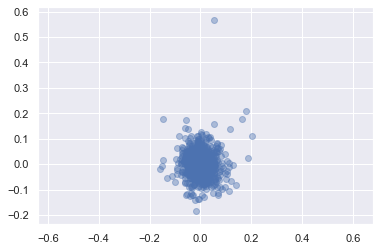

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.scatter(princ_comps[:, 1], princ_comps[:, 0], alpha=0.4)
plt.axis('equal');

In [ ]:
#from pyspark.ml.clustering import KMeans

#kmeans = KMeans(k=5, seed=1)
#model_kmeans = kmeans.fit(monthly_return_std_df.select("features"))
#transformed = model_kmeans.transform(monthly_return_std_df)
#transformed.groupBy("prediction").count().orderBy(col("count").desc()).show() 